# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# lets split the dataset into those of   black-sounding names and white-sounding names 

dfb = data[data.race=='b']
dfw = data[data.race=='w']

In [4]:
dfb.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
7,b,1,3,4,21,0,1,0,1,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [5]:
dfw.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [6]:
print("Number of employers calls for black-sounding names  " + str(int(sum(dfb.call))) + " in a population of " + str(len(dfb)))
print("Number of employers calls for white-sounding names  " + str(int(sum(dfw.call))) + " in a population of " + str(len(dfw)))


Number of employers calls for black-sounding names  157 in a population of 2435
Number of employers calls for white-sounding names  235 in a population of 2435


Given the large sample size , we go for a 2-sample comparison of means / z_test 

In [7]:
dw = DescrStatsW(dfw.call)
db = DescrStatsW(dfb.call)

In [8]:
print("The mean for the callback of white sounding names is {0:.3f}".format(dw.mean), " variance is {0:.3f}".format(dw.var))
a,b = dw.tconfint_mean()
me = (b-a)/2
print("Confidence Interval of the Mean for  white sounding names [{0:.4f},".format(a)," {0:.4f}]".format(b))
print("Margin of Error {0:.4f}".format(me))

The mean for the callback of white sounding names is 0.097  variance is 0.087
Confidence Interval of the Mean for  white sounding names [0.0848,  0.1082]
Margin of Error 0.0117


In [9]:
a,b = db.tconfint_mean()
me = (b-a)/2
print("The mean for the callback of black sounding names is {0:.3f}".format(db.mean), " variance is {0:.3f}".format(db.var))
print("Confidence Interval of the Mean for  black sounding names [{0:.4f},".format(a)," {0:.4f}]".format(b))
print("Margin of Error {0:.4f}".format(me))

The mean for the callback of black sounding names is 0.064  variance is 0.060
Confidence Interval of the Mean for  black sounding names [0.0547,  0.0742]
Margin of Error 0.0098


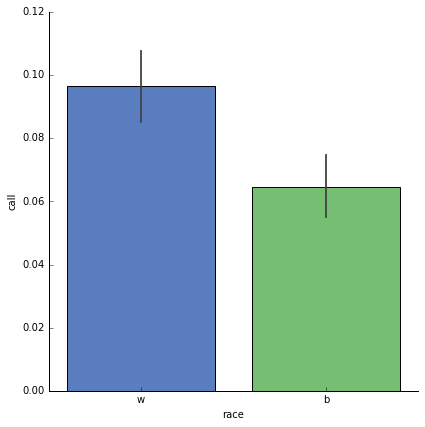

In [10]:
%matplotlib inline
g = sns.factorplot(x="race", y="call",data=data,
                   size=6, kind="bar", palette="muted")
plt.show()

In [11]:
cm = CompareMeans(dw,db)

In [12]:
ts,pv,df = cm.ttest_ind()
print("T Statistic  Score is {0:.3f}".format(ts))
print("P Value is {0:.5f}".format(pv))
if (pv < 0.05):
    print("We reject the null hypothesis ")
else:
    print("We reject the alternative hypothesis")

T Statistic  Score is 4.115
P Value is 0.00004
We reject the null hypothesis 


In [13]:
a,b = cm.tconfint_diff()
print("Confidence Interval for the Difference in Means of two groups [{0:.4f},".format(a)," {0:.4f}]".format(b))
me = (b-a)/2
print("Margin of Error {0:.4f}".format(me))

Confidence Interval for the Difference in Means of two groups [0.0168,  0.0473]
Margin of Error 0.0153


Let us also look at the call back rates for factors such as eductaion and years of experience 

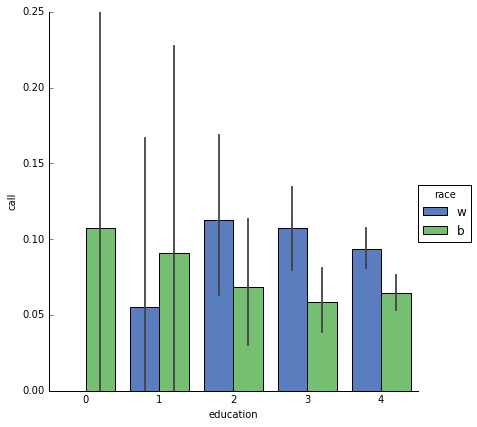

In [14]:
%matplotlib inline
g = sns.factorplot(x="education", y="call", hue="race",data=data,
                   size=6, kind="bar", palette="muted")
plt.show()

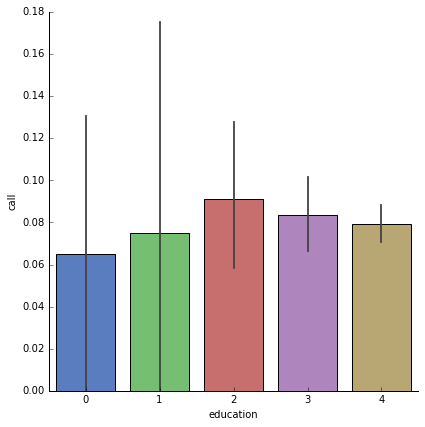

In [15]:
%matplotlib inline
g = sns.factorplot(x="education", y="call",data=data,
                   size=6, kind="bar", palette="muted")
plt.show()

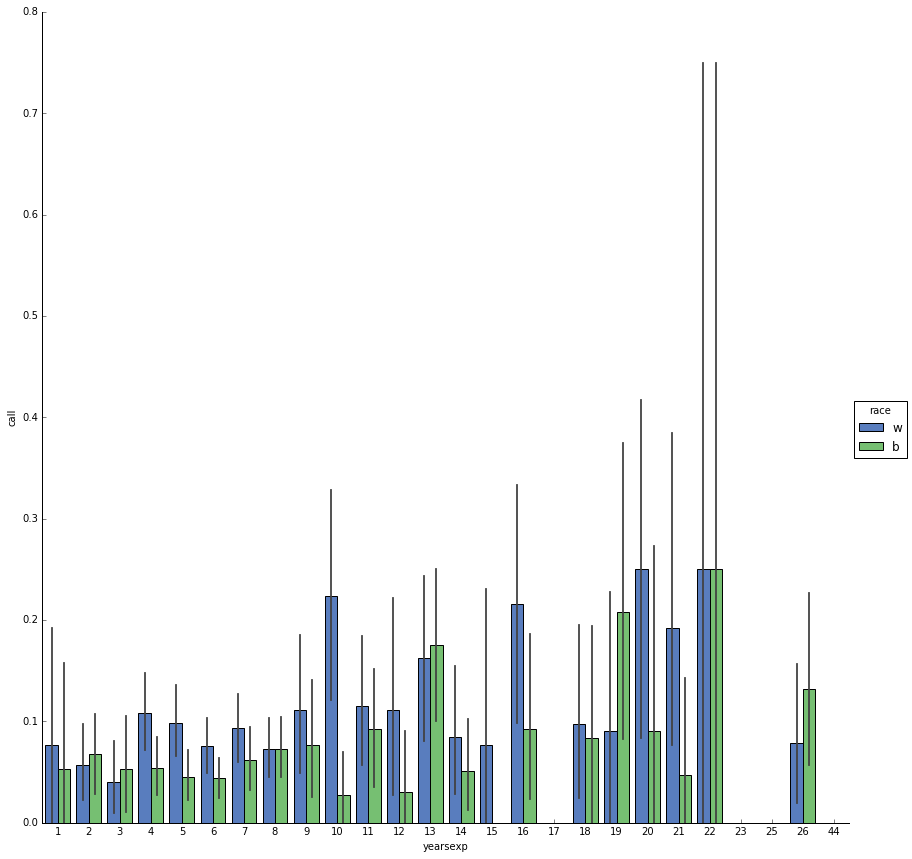

In [16]:
%matplotlib inline
g = sns.factorplot(x="yearsexp", y="call", hue="race",data=data,
                   size=12, kind="bar", palette="muted")
plt.show()

# conclusion
Based on the p-value of the 2 sample mean test , we conclude that the there is a significant difference between callbacks for white and black sounding names.
We can conclude there is correlation (not causation) between the race/nametypes and callback rates. Impact of other factors such as the candidates experience , education background on callback rates should be analyzed further 